# [**Tracé de différents classificateurs SVM dans l'ensemble de données iris**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_4_svm/plot_iris_svc.ipynb)<br/>([*Plot different SVM classifiers in the iris dataset*](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html))

Comparaison de différents classifieurs SVM linéaires sur une projection 2D du jeu de données de l'iris. Nous ne considérons que les 2 premières caractéristiques de cet ensemble de données :
* Longueur des sépales
* Largeur des sépales

Cet exemple montre comment tracer la surface de décision pour quatre classificateurs SVM avec différents noyaux.

Les modèles linéaires `LinearSVC()` et `SVC(kernel='linear')` donnent des limites de décision légèrement différentes. Cela peut être une conséquence des différences suivantes :
* `LinearSVC` minimise la perte charnière au carré tandis que `SVC` minimise la perte charnière régulière.
* `LinearSVC` utilise la réduction multiclasse One-vs-All (également appelée One-vs-Rest) tandis que `SVC` utilise la réduction multiclasse One-vs-One.

Les deux modèles linéaires ont des frontières de décision linéaires (hyperplans qui se croisent) tandis que les modèles à noyau non linéaires (polynomial ou RBF gaussien) ont des frontières de décision non linéaires plus flexibles avec des dimensions qui dépendent du type de noyau et de ses paramètres.

**NB** > Bien que le tracé de la fonction de décision des classifieurs pour les ensembles de données 2D puisse aider à obtenir une compréhension intuitive de leur pouvoir expressif respectif, sachez que ces intuitions ne se généralisent pas toujours à des problèmes de grande dimension plus réalistes.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

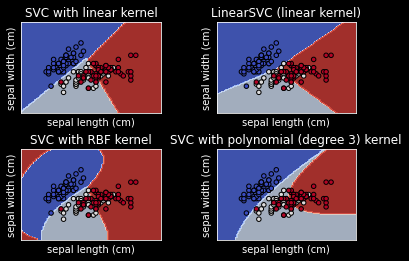

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib as mpl
mpl.style.use('dark_background')


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()